In [2]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [58]:
img1 = cv.imread("lenna.png")[:,:,0]
img2 = cv.imread("grey.png")[:,:,0]

# A. Statistical Analysis
## 1. Histogram 

In [17]:
def plotHist(imga, imgb):
    plt.hist(img.ravel(),256,[0,256])
    return None
    

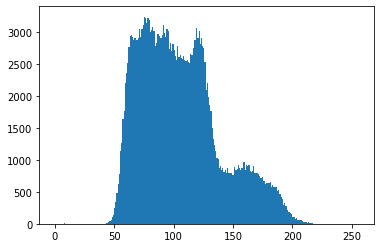

In [71]:
plotHist(img1)

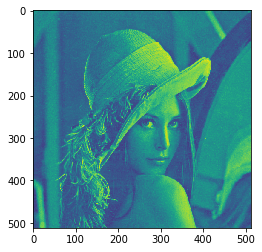

In [74]:
plt.imshow(img1)

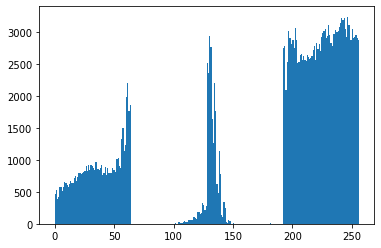

In [72]:
plotHist(img2)

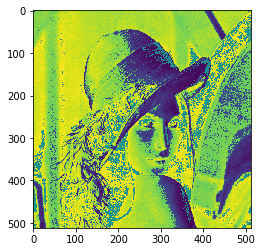

In [73]:
plt.imshow(img2)

## 2. Correlation Coefficient

In [62]:
def funcE(img):
    M,N = img.shape[0], img.shape[1]
    summ = 0
    for i in range(M):
        for j in range(N):
            summ += img[i,j]
    return summ/(M*N)

def funcD(img, E):
    M,N = img.shape[0], img.shape[1]
    summ = 0
    for i in range(M):
        for j in range(N):
            summ += (img[i,j]-E)**2
    return summ/(M*N)

def CovH(img, E):
    M,N = img.shape[0], img.shape[1]
    summ = 0
    for i in range(M):
        for j in range(N-1):
            summ += (img[i,j]-E)*(img[i,j+1]-E)
    return summ/(M*N)

def CovV(img, E):
    M,N = img.shape[0], img.shape[1]
    summ = 0
    for i in range(M-1):
        for j in range(N):
            summ += (img[i,j]-E)*(img[i+1,j]-E)
    return summ/(M*N)

def CovD(img, E):
    M,N = img.shape[0], img.shape[1]
    summ = 0
    for i in range(M-1):
        for j in range(N-1):
            summ += (img[i,j]-E)*(img[i+1, j+1] - E)
    return summ/(M*N)
    
    
def rH(img):
    E = funcE(img)
    return CovH(img, E)/funcD(img,E)
def rV(img):
    E = funcE(img)
    return CovV(img, E)/funcD(img,E)
def rD(img):
    E = funcE(img)
    return CovD(img, E)/funcD(img,E)
    
    
    

In [65]:
rH(img1), rH(img2)

(0.9309367371045671, 0.7829277665547136)

In [66]:
rV(img1),rV(img2)

(0.9566403003738211, 0.8163677650819241)

In [67]:
rD(img1), rD(img2)

(0.9155852520480469, 0.7656362233242384)

# B. Entropy Calculation

In [56]:
def CalcEntropy(img):
    M,N = img.shape[0], img.shape[1]
    frequencies = np.array([0 for i in range(256)])
    for i in range(M):
        for j in range(N):
            intensityvalue = img[i,j]
            frequencies[intensityvalue] += 1
    probability = frequencies/(M*N)
    summ = 0
    for i in range(256):
        num = probability[i] 
        if  num == 0:
            continue
        else:
            summ += (-1*num*np.log2(num))
    return summ

In [69]:
CalcEntropy(img1), CalcEntropy(img2)

(6.968426946008588, 6.968426946008594)